In [18]:
# import the necessary libraries

import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

# import the dataset

data = pd.read_csv("adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


##### The dataset contains two columns; Time Period and Revenue. The Time Period column contains the quarterly revenue of Adidas from 2000 to 2021, and the Revenue column contains the sales revenue in millions (euros).

In [19]:
# plot the quarterly sales revenue of Adidas

import plotly.express as px
figure = px.line(data, x="Time Period", 
                 y="Revenue", 
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

##### The sales revenue data of Adidas is seasonal as the quarterly revenue increases and decreases every quarter.

<Figure size 640x480 with 0 Axes>

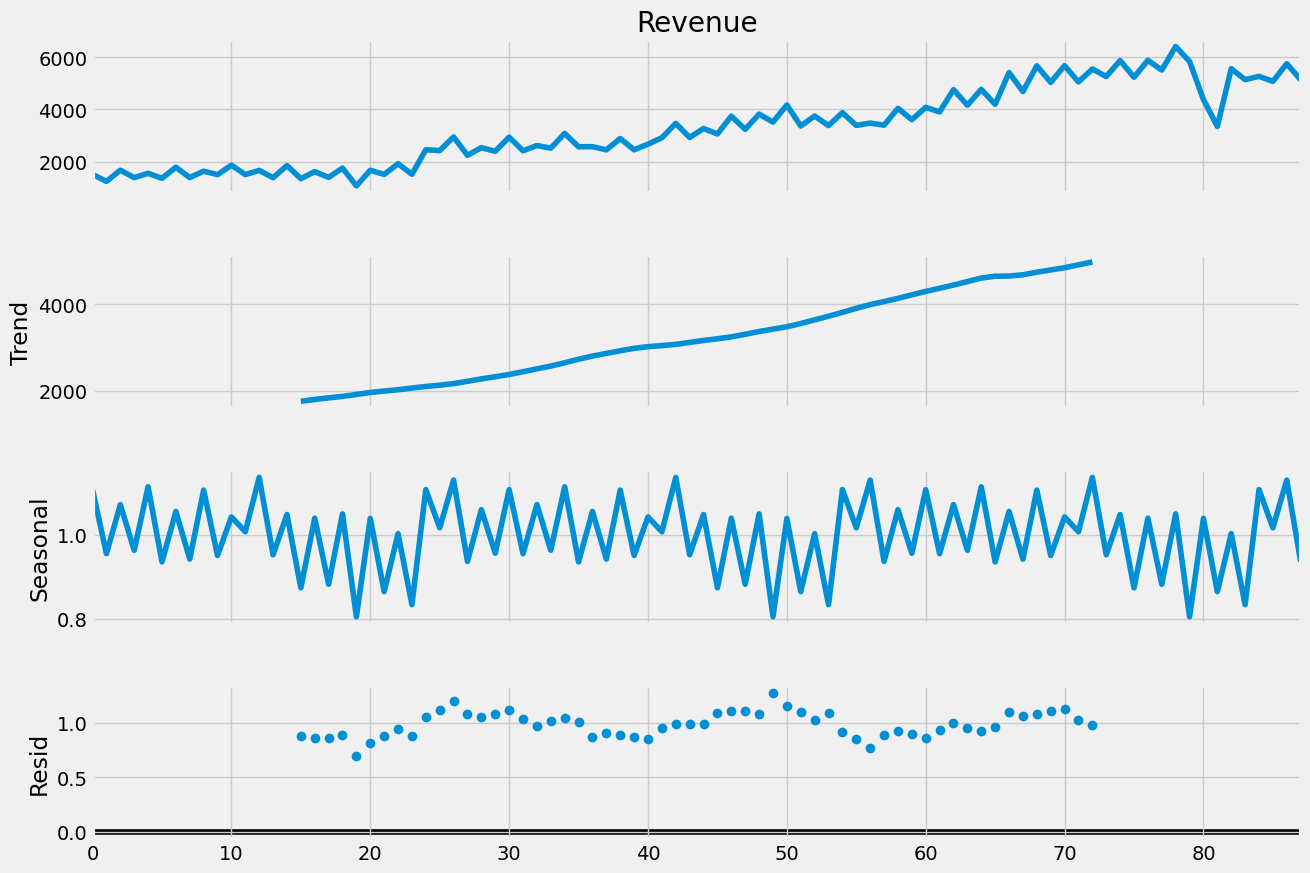

In [20]:
# Check the seasonality of any time series data:

result = seasonal_decompose(data["Revenue"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

##### I will use the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

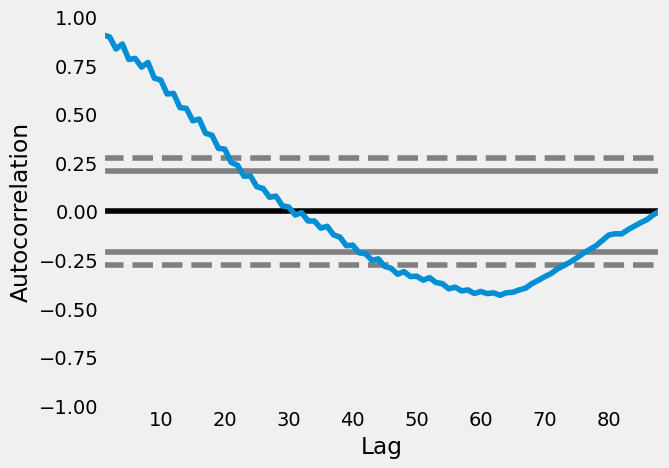

In [21]:
pd.plotting.autocorrelation_plot(data["Revenue"])

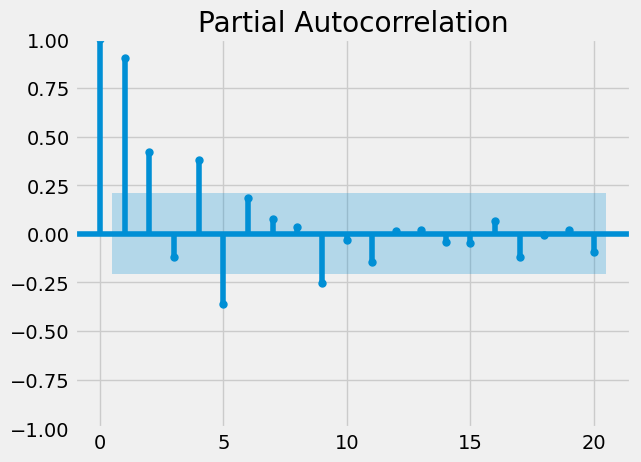

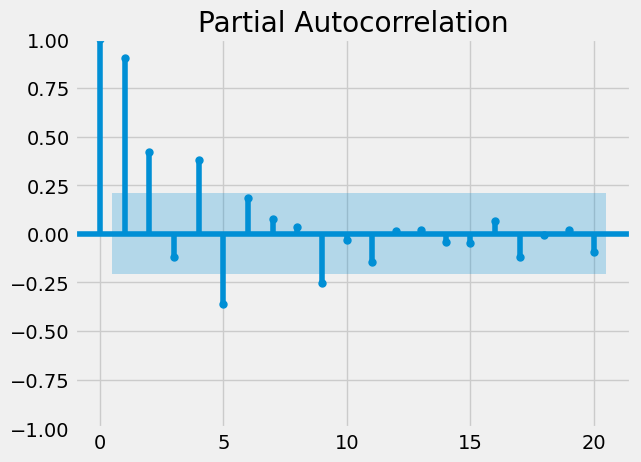

In [22]:
plot_pacf(data["Revenue"], lags = 20)

##### Now we have to train a SARIMA model to predict the quarterly revenue of Adidas:

In [25]:
import statsmodels.api as sm

# Define the SARIMA model orders (p, d, q)
p = 5  # Example value for the autoregressive order
d = 1  # Example value for differencing
q = 2  # Example value for the moving average order

# Create and fit the SARIMA model
model = sm.tsa.statespace.SARIMAX(data['Revenue'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()

# Print the model summary
print(model.summary())


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Tue, 17 Oct 2023   AIC                           1127.041
Time:                                    13:03:27   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5795      0.390     -4.053      0.000      -2.343      -0.816
ar.L2         -1.4321      0.583   

In [26]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.861329
89    5186.334855
90    6293.202057
91    5752.001944
92    5911.950747
93    5499.688257
94    6389.657376
95    5728.826065
Name: predicted_mean, dtype: float64


<Axes: >

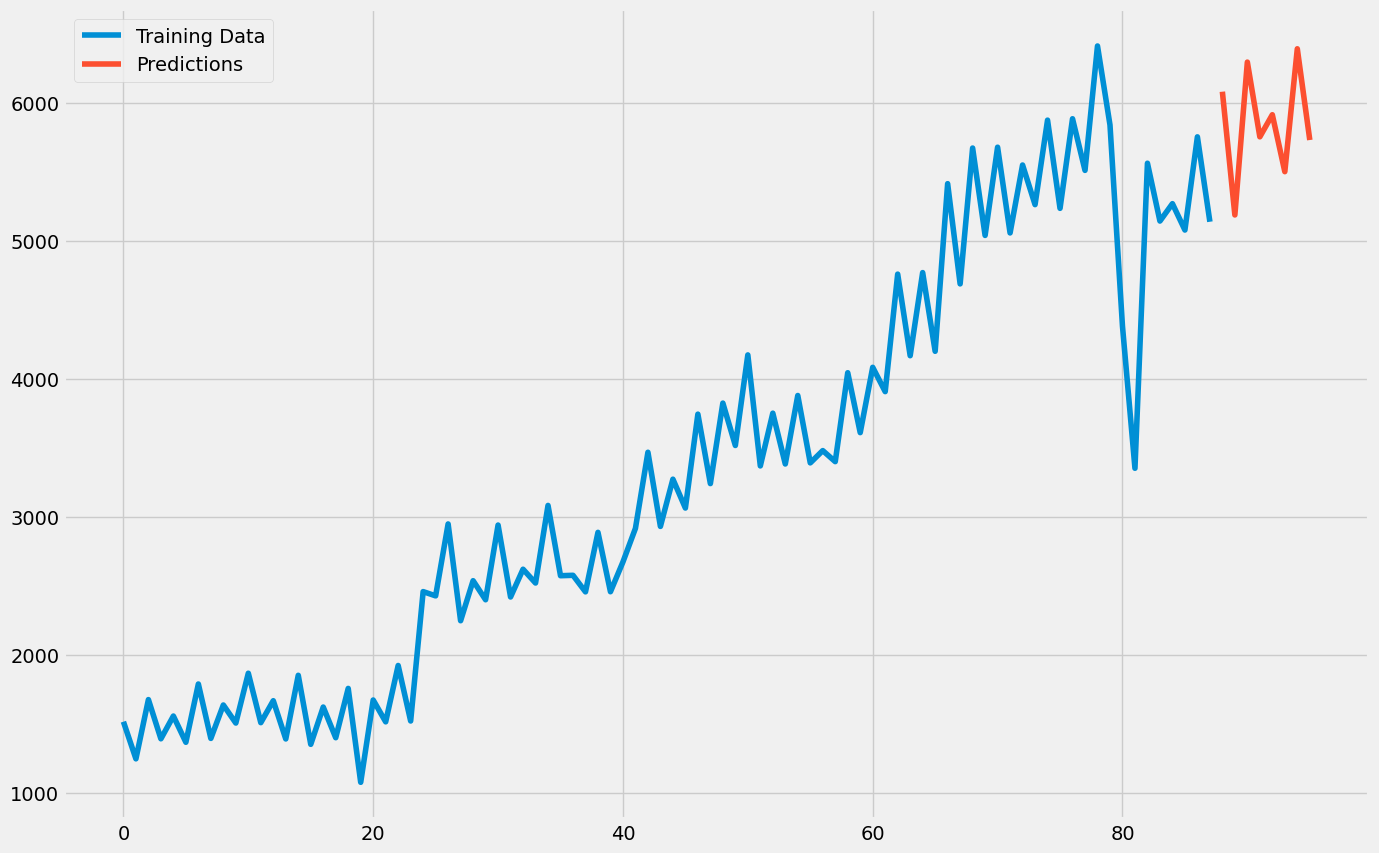

In [27]:
# plot the predictions:

data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

#### Summary

##### This is how we can perform business forecasting using the Python programming language. In Business Forecasting, we aim to forecast future sales, expenditure, or revenue by using the historical Time Series data generated by the business.